In [ ]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
pip install vadersentiment

     |████████████████████████████████| 133kB 3.4MB/s 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving result.csv to result (1).csv


Enter Keyword/Tag to search about: samsung note 7
Enter how many tweets to search: 500
RT @tatchero: Today won’t end well if I don’t celebrate my Nephew!
My number one model. 
Happy birthday To a happy boy!
Aspiring Model.
Com…
RT @tatchero: Today won’t end well if I don’t celebrate my Nephew!
My number one model. 
Happy birthday To a happy boy!
Aspiring Model.
Com…
RT @tatchero: Today won’t end well if I don’t celebrate my Nephew!
My number one model. 
Happy birthday To a happy boy!
Aspiring Model.
Com…
Samsung Galaxy Note 10 Lite 128GB ...: List Price: $649.99 Deal Price: $469.99 You Save: $28%… https://t.co/zDdPKasTIC
RT @tatchero: Today won’t end well if I don’t celebrate my Nephew!
My number one model. 
Happy birthday To a happy boy!
Aspiring Model.
Com…
RT @tatchero: Today won’t end well if I don’t celebrate my Nephew!
My number one model. 
Happy birthday To a happy boy!
Aspiring Model.
Com…
RT @tatchero: Today won’t end well if I don’t celebrate my Nephew!
My number one model. 


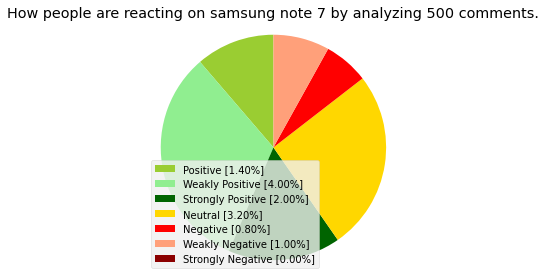

In [ ]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt


class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        consumerKey = 'pHiMRVNb4633JNTlARZrkW01y'
        consumerSecret = 'dQBIGMhuwjuJh1crI5TKxQzeFeZx7FBm8wd6Cv7gNA1Uk1vdit'
        accessToken = '960593489347178499-Y4PnAnolCjo8ksEi8IYzof4pNT97Go2'
        accessTokenSecret = 'qO58Ws0MFw5LyaW5esJaWZGWjjVBE5uragEnAwcYPiMHl'
        try:
          auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
          auth.set_access_token(accessToken, accessTokenSecret)
          api = tweepy.API(auth)

          searchTerm = input("Enter Keyword/Tag to search about: ")
          NoOfTerms = int(input("Enter how many tweets to search: "))

          self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

          csvFile = open('result.csv', 'a')

          csvWriter = csv.writer(csvFile)

          polarity = 0
          positive = 0
          wpositive = 0
          spositive = 0
          negative = 0
          wnegative = 0
          snegative = 0
          neutral = 0

          for tweet in self.tweets:
             
              self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
              print(tweet.text)
           
              analysis = TextBlob(tweet.text)
         
              polarity += analysis.sentiment.polarity
              if (analysis.sentiment.polarity == 0):  
                  neutral += 1
              elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                  wpositive += 1
              elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                  positive += 1
              elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                  spositive += 1
              elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                  wnegative += 1
              elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                  negative += 1
              elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                  snegative += 1


          csvWriter.writerow(self.tweetText)
          csvFile.close()

          positive = self.percentage(positive, NoOfTerms)
          wpositive = self.percentage(wpositive, NoOfTerms)
          spositive = self.percentage(spositive, NoOfTerms)
          negative = self.percentage(negative, NoOfTerms)
          wnegative = self.percentage(wnegative, NoOfTerms)
          snegative = self.percentage(snegative, NoOfTerms)
          neutral = self.percentage(neutral, NoOfTerms)

          polarity = polarity / NoOfTerms

          print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " comments.")
          print()
          print("General Report: ")

          if (polarity == 0):
              print("Neutral")
          elif (polarity > 0 and polarity <= 0.3):
              print("Weakly Positive")
          elif (polarity > 0.3 and polarity <= 0.6):
              print("Positive")
          elif (polarity > 0.6 and polarity <= 1):
              print("Strongly Positive")yas
          elif (polarity > -0.3 and polarity <= 0):
              print("Weakly Negative")
          elif (polarity > -0.6 and polarity <= -0.3):
              print("Negative")
          elif (polarity > -1 and polarity <= -0.6):
              print("Strongly Negative")

          print()
          print("Detailed Report: ")
          print(str(positive) + "% people thought it was positive")
          print(str(wpositive) + "% people thought it was weakly positive")
          print(str(spositive) + "% people thought it was strongly positive")
          print(str(negative) + "% people thought it was negative")
          print(str(wnegative) + "% people thought it was weakly negative")
          print(str(snegative) + "% people thought it was strongly negative")
          print(str(neutral) + "% people thought it was neutral")

          self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)
        except tweepy.error.TweepError:
          raise


    def cleanTweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' comments.')
        plt.axis('equal')
        plt.tight_layout()
        print("\n")
        print("\n")
        print("\n")
        print("\n")
        
        plt.show()



if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()